 # Clustering Crypto

 ## Installing External Libraries

In [1]:
# Install the altair plotting library: https://altair-viz.github.io/
!pip install -U altair

Requirement already up-to-date: altair in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (3.2.0)
Requirement not upgraded as not directly required: numpy in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (1.14.3)
Requirement not upgraded as not directly required: entrypoints in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.2.3)
Requirement not upgraded as not directly required: jsonschema in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (2.6.0)
Requirement not upgraded as not directly required: jinja2 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (2.10)
Requirement not upgraded as not directly required: pandas in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.24.2)
Requirement not upgraded as not directly required: toolz in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (fro

In [2]:
# Initial imports
import requests
import pandas as pd
import altair as alt
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [ ]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"
response = requests.get(url).json()

In [ ]:
# Create a DataFrame
crypto_df = pd.DataFrame(response['Data']).T
crypto_df.head()

In [ ]:
# Alternatively, use the provided csv file:
# file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame
# crypto_df = pd.read_csv(file_path, index_col=0)
# crypto_df.head(10)

 ### Data Preprocessing

In [3]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df=crypto_df[['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply']]
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
# Keep only cryptocurrencies that are trading
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [5]:
# Keep only cryptocurrencies with a working algorithm
crypto_df = crypto_df[crypto_df["Algorithm"] != "N/A"]
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [6]:
# Remove the "IsTrading" column
crypto_df.drop("IsTrading", axis=1, inplace=True)
print(crypto_df.shape)
crypto_df.head(10)

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [7]:
# Remove rows with at least 1 null value
crypto_df = crypto_df.dropna(axis=0, how="any")
print(crypto_df.shape)
crypto_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [8]:
# Remove rows with cryptocurrencies withouhaving no coins mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
print(crypto_df.shape)
crypto_df.head(10)

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [9]:
# Drop rows where there are 'N/A' text values
crypto_df = crypto_df[crypto_df.iloc[:] != 'N/A'].dropna()
crypto_df.head(10)

(532, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [10]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coins_name = pd.DataFrame(crypto_df["CoinName"], index=crypto_df.index)
print(coins_name.shape)
coins_name.head()

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [11]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df = crypto_df.drop("CoinName", axis=1)
print(crypto_df.shape)
crypto_df.head(10)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Create dummy variables for text features
X = pd.get_dummies(data=crypto_df, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head(10)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

In [ ]:
# Standardize data
X = StandardScaler().fit_transform(X)
X[:5]

 ### Reducing Dimensions Using PCA

In [13]:
# Use PCA to reduce dimension to 3 principal components
n_comp = 3
pca = PCA(n_components=n_comp)
principal_components = pca.fit_transform(X)
principal_components

array([[-0.33730955,  1.08194557, -0.37668659],
       [-0.32063105,  1.0821204 , -0.37716892],
       [ 2.30347915,  1.65841599, -0.5079926 ],
       ...,
       [ 0.31911641, -2.29451519,  0.31235355],
       [-0.16544195, -2.0718468 ,  0.15685175],
       [-0.29072706,  0.84564675, -0.15234827]])

In [14]:
# Create a DataFrame with the principal components data
col_names = [f"PC {i}" for i in range(1, n_comp + 1)]
pcs_df = pd.DataFrame(principal_components, columns=col_names, index=crypto_df.index)
print(pcs_df.shape)
pcs_df.head(10)

(532, 3)


,PC 1,PC 2,PC 3
42,-0.337310,1.081946,-0.376687
404,-0.320631,1.082120,-0.377169
1337,2.303479,1.658416,-0.507993
BTC,-0.139675,-1.311413,0.135082
ETH,-0.149715,-2.036022,0.237966
LTC,-0.167853,-1.070010,0.018563
DASH,-0.390818,1.155356,-0.456691
XMR,-0.132352,-2.139376,0.255300
ETC,-0.148157,-2.036119,0.237942
ZEC,-0.165441,-2.071847,0.156852


 ### Clustering Crytocurrencies Using K-Means

 #### Finde the Best Value for `k` Using the Elbow Curve

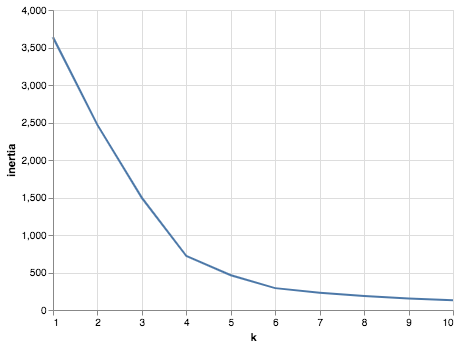

In [15]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
alt.Chart(df_elbow).mark_line().encode(x="k", y="inertia")


 Running K-Means with `k=4`

In [16]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = pd.concat([crypto_df, pcs_df], axis=1, sort=False)
clustered_df["CoinName"] = coins_name["CoinName"]
clustered_df["Class"] = model.labels_
print(clustered_df.shape)
clustered_df.head(10)


(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.337310,1.081946,-0.376687,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.320631,1.082120,-0.377169,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.303479,1.658416,-0.507993,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.139675,-1.311413,0.135082,Bitcoin,2
ETH,Ethash,PoW,1.076842e+08,0,-0.149715,-2.036022,0.237966,Ethereum,2
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.167853,-1.070010,0.018563,Litecoin,2
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.390818,1.155356,-0.456691,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.132352,-2.139376,0.255300,Monero,2
ETC,Ethash,PoW,1.133597e+08,210000000,-0.148157,-2.036119,0.237942,Ethereum Classic,2
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.165441,-2.071847,0.156852,ZCash,2


 ### Visualizing Results

 #### Scatter Plot for Clusters

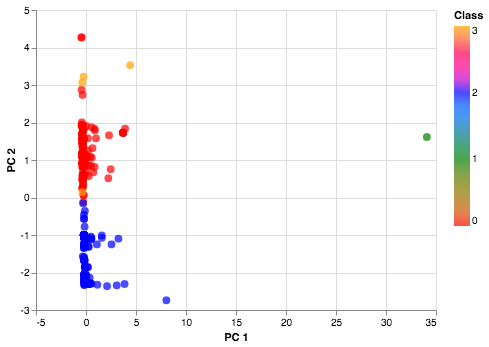

In [17]:
# Scatter plot to visualize clusters using two principal components
alt.Chart(clustered_df).mark_circle(size=60).encode(
    x="PC 1",
    y="PC 2",
    color=alt.Color(
        "Class",
        scale=alt.Scale(domain=[0, 1, 2, 3], range=["red", "green", "blue", "orange"]),
    ),
    tooltip=["CoinName", "Algorithm", "TotalCoinsMined", "TotalCoinSupply"],
).interactive()


 #### Scatter Plot with Tradable Cryptocurrencies

In [18]:
# Scale data to create the scatter plot
mm_scaler = MinMaxScaler()
plot_data = mm_scaler.fit_transform(
    clustered_df[["TotalCoinSupply", "TotalCoinsMined"]]
)
plot_df = pd.DataFrame(
    plot_data, columns=["TotalCoinSupply", "TotalCoinsMined"], index=clustered_df.index
)
plot_df["CoinName"] = clustered_df["CoinName"]
plot_df["Class"] = clustered_df["Class"]
plot_df.head()



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,2
ETH,0.000000e+00,0.000109,Ethereum,2


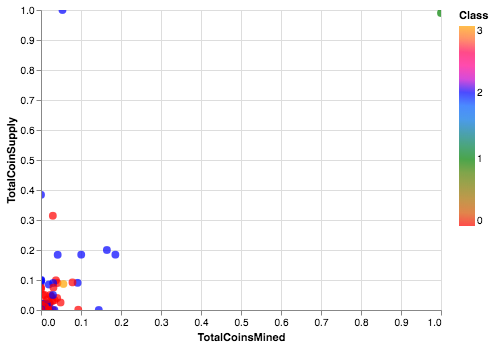

In [19]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
alt.Chart(plot_df).mark_circle(size=60).encode(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    color=alt.Color(
        "Class",
        scale=alt.Scale(domain=[0, 1, 2, 3], range=["red", "green", "blue", "orange"]),
    ),
    tooltip=["CoinName", "TotalCoinsMined", "TotalCoinSupply"],
).interactive()


 #### Table of Tradable Cryptocurrencies

In [20]:
# Table with tradable cryptos
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(
        clustered_df[
            [
                "CoinName",
                "Algorithm",
                "ProofType",
                "TotalCoinSupply",
                "TotalCoinsMined",
                "Class",
            ]
        ]
    )



,CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class
42,42 Coin,Scrypt,PoW/PoS,42,4.199995e+01,0
404,404Coin,Scrypt,PoW/PoS,532000000,1.055185e+09,0
1337,EliteCoin,X13,PoW/PoS,314159265359,2.927942e+10,0
BTC,Bitcoin,SHA-256,PoW,21000000,1.792718e+07,2
ETH,Ethereum,Ethash,PoW,0,1.076842e+08,2
LTC,Litecoin,Scrypt,PoW,84000000,6.303924e+07,2
DASH,Dash,X11,PoW/PoS,22000000,9.031294e+06,0
XMR,Monero,CryptoNight-V7,PoW,0,1.720114e+07,2
ETC,Ethereum Classic,Ethash,PoW,210000000,1.133597e+08,2
ZEC,ZCash,Equihash,PoW,21000000,7.383056e+06,2
